In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

617

In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key


In [8]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
     # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | kungurtug
Processing Record 2 of Set 1 | qaanaaq
Processing Record 3 of Set 1 | ierapetra
Processing Record 4 of Set 1 | sagua la grande
Processing Record 5 of Set 1 | busselton
Processing Record 6 of Set 1 | rikitea
Processing Record 7 of Set 1 | xuanhua
Processing Record 8 of Set 1 | hilo
Processing Record 9 of Set 1 | hay river
Processing Record 10 of Set 1 | punta arenas
Processing Record 11 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 12 of Set 1 | strezhevoy
Processing Record 13 of Set 1 | alofi
Processing Record 14 of Set 1 | tasiilaq
Processing Record 15 of Set 1 | airai
Processing Record 16 of Set 1 | puerto ayora
Processing Record 17 of Set 1 | vysokogornyy
Processing Record 18 of Set 1 | barrow
Processing Record 19 of Set 1 | mataura
Processing Record 20 of Set 1 | hobart
Processing Record 21 of Set 1 | ushuaia
Processing Record 22 of Set 1 | petropavlovsk-

Processing Record 38 of Set 4 | salalah
Processing Record 39 of Set 4 | tripoli
Processing Record 40 of Set 4 | kerrobert
Processing Record 41 of Set 4 | luderitz
Processing Record 42 of Set 4 | lavrentiya
Processing Record 43 of Set 4 | bredasdorp
Processing Record 44 of Set 4 | grand river south east
City not found. Skipping...
Processing Record 45 of Set 4 | truth or consequences
Processing Record 46 of Set 4 | santarem
Processing Record 47 of Set 4 | tadine
Processing Record 48 of Set 4 | turayf
Processing Record 49 of Set 4 | new norfolk
Processing Record 50 of Set 4 | kruisfontein
Processing Record 1 of Set 5 | kloulklubed
Processing Record 2 of Set 5 | ibra
Processing Record 3 of Set 5 | talnakh
Processing Record 4 of Set 5 | jinchang
Processing Record 5 of Set 5 | marawi
Processing Record 6 of Set 5 | zhongshu
Processing Record 7 of Set 5 | morondava
Processing Record 8 of Set 5 | kontagora
Processing Record 9 of Set 5 | formoso do araguaia
City not found. Skipping...
Processin

Processing Record 26 of Set 8 | karratha
Processing Record 27 of Set 8 | nuuk
Processing Record 28 of Set 8 | jinchengjiang
City not found. Skipping...
Processing Record 29 of Set 8 | ruteng
Processing Record 30 of Set 8 | sinnamary
Processing Record 31 of Set 8 | talcahuano
Processing Record 32 of Set 8 | moss point
Processing Record 33 of Set 8 | axim
Processing Record 34 of Set 8 | bichura
Processing Record 35 of Set 8 | rincon
Processing Record 36 of Set 8 | porto santo
Processing Record 37 of Set 8 | ossora
Processing Record 38 of Set 8 | yuzhno-yeniseyskiy
City not found. Skipping...
Processing Record 39 of Set 8 | hunza
City not found. Skipping...
Processing Record 40 of Set 8 | ust-nera
Processing Record 41 of Set 8 | nikolskoye
Processing Record 42 of Set 8 | maxixe
Processing Record 43 of Set 8 | hammond
Processing Record 44 of Set 8 | nara
Processing Record 45 of Set 8 | north bend
Processing Record 46 of Set 8 | fort saint james
Processing Record 47 of Set 8 | namibe
Proces

Processing Record 11 of Set 12 | andenes
Processing Record 12 of Set 12 | koungou
Processing Record 13 of Set 12 | tungkang
City not found. Skipping...
Processing Record 14 of Set 12 | oriximina
Processing Record 15 of Set 12 | malard
Processing Record 16 of Set 12 | hoi an
Processing Record 17 of Set 12 | isiro
Processing Record 18 of Set 12 | mackenzie
Processing Record 19 of Set 12 | medicine hat
Processing Record 20 of Set 12 | gondanglegi
Processing Record 21 of Set 12 | cassilandia
Processing Record 22 of Set 12 | meyungs
City not found. Skipping...
Processing Record 23 of Set 12 | bagdarin
Processing Record 24 of Set 12 | redlands
Processing Record 25 of Set 12 | mlonggo
Processing Record 26 of Set 12 | sorvag
City not found. Skipping...
Processing Record 27 of Set 12 | tir pol
City not found. Skipping...
Processing Record 28 of Set 12 | moranbah
Processing Record 29 of Set 12 | smithers
Processing Record 30 of Set 12 | halifax
Processing Record 31 of Set 12 | iskateley
Processi

In [31]:
len(city_data)

458

In [37]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(15)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Pakxan,18.3778,103.6601,90.01,39,95,2.10,LA,2022-04-30 03:43:42
1,Ngunguru,-35.6167,174.5000,65.05,68,29,13.65,NZ,2022-04-30 03:39:34
2,Key Largo,25.0865,-80.4473,77.00,69,2,11.65,US,2022-04-30 03:43:43
3,Barrow,71.2906,-156.7887,15.82,79,100,18.41,US,2022-04-30 03:41:19
4,Wahiawa,21.5028,-158.0236,79.12,71,75,9.22,US,2022-04-30 03:43:43
5,Vaini,-21.2000,-175.2000,73.56,100,100,5.75,TO,2022-04-30 03:41:10
6,Somerset East,-32.7217,25.5880,48.47,88,0,1.68,ZA,2022-04-30 03:43:44
7,Lata,40.1629,-8.3327,55.08,73,0,2.01,PT,2022-04-30 03:34:00
8,Solikamsk,59.6196,56.7729,37.00,50,5,8.95,RU,2022-04-30 03:43:45
9,Saint George,37.1041,-113.5841,70.39,17,0,9.22,US,2022-04-30 03:43:46


In [38]:
new_column_order = ["City","Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]

In [39]:
city_data_df = city_data_df[new_column_order]
city_data_df.head(15)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Pakxan,LA,2022-04-30 03:43:42,18.3778,103.6601,90.01,39,95,2.10
1,Ngunguru,NZ,2022-04-30 03:39:34,-35.6167,174.5000,65.05,68,29,13.65
2,Key Largo,US,2022-04-30 03:43:43,25.0865,-80.4473,77.00,69,2,11.65
3,Barrow,US,2022-04-30 03:41:19,71.2906,-156.7887,15.82,79,100,18.41
4,Wahiawa,US,2022-04-30 03:43:43,21.5028,-158.0236,79.12,71,75,9.22
5,Vaini,TO,2022-04-30 03:41:10,-21.2000,-175.2000,73.56,100,100,5.75
6,Somerset East,ZA,2022-04-30 03:43:44,-32.7217,25.5880,48.47,88,0,1.68
7,Lata,PT,2022-04-30 03:34:00,40.1629,-8.3327,55.08,73,0,2.01
8,Solikamsk,RU,2022-04-30 03:43:45,59.6196,56.7729,37.00,50,5,8.95
9,Saint George,US,2022-04-30 03:43:46,37.1041,-113.5841,70.39,17,0,9.22


In [40]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [41]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

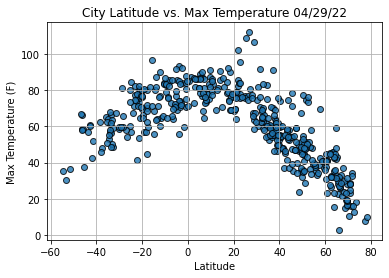

In [42]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

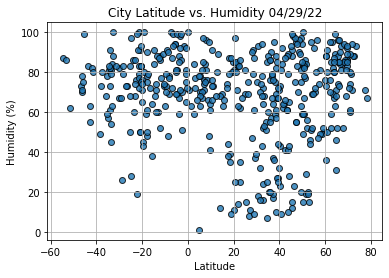

In [43]:
# Build the scatter plot for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

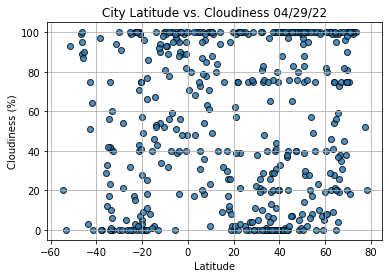

In [44]:
# Build the scatter plot for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

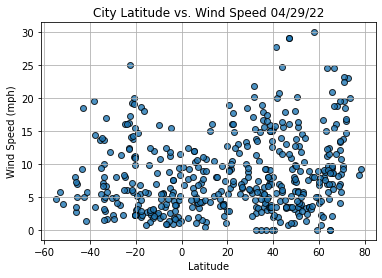

In [45]:
# Build the scatter plot for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()

In [46]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [47]:
index13 = city_data_df.loc[13]
index13

City                       Kodiak
Country                        US
Date          2022-04-30 03:43:47
Lat                         57.79
Lng                     -152.4072
Max Temp                    42.31
Humidity                       81
Cloudiness                    100
Wind Speed                  29.93
Name: 13, dtype: object

In [48]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Pakxan,LA,2022-04-30 03:43:42,18.3778,103.6601,90.01,39,95,2.10
2,Key Largo,US,2022-04-30 03:43:43,25.0865,-80.4473,77.00,69,2,11.65
3,Barrow,US,2022-04-30 03:41:19,71.2906,-156.7887,15.82,79,100,18.41
4,Wahiawa,US,2022-04-30 03:43:43,21.5028,-158.0236,79.12,71,75,9.22
7,Lata,PT,2022-04-30 03:34:00,40.1629,-8.3327,55.08,73,0,2.01
8,Solikamsk,RU,2022-04-30 03:43:45,59.6196,56.7729,37.00,50,5,8.95
9,Saint George,US,2022-04-30 03:43:46,37.1041,-113.5841,70.39,17,0,9.22
11,Rangia,IN,2022-04-30 03:43:47,26.4667,91.6333,76.95,75,99,6.31
12,Hilo,US,2022-04-30 03:43:46,19.7297,-155.0900,77.29,85,100,12.66
13,Kodiak,US,2022-04-30 03:43:47,57.7900,-152.4072,42.31,81,100,29.93


In [49]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

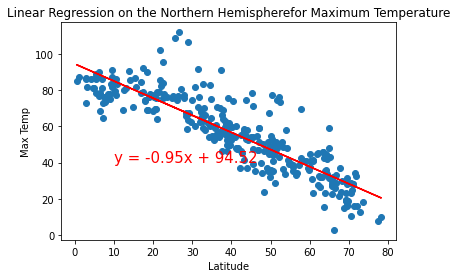

In [50]:
# Linear regression on the Northern Hemisphere for Max Temp
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemispherefor Maximum Temperature', 'Max Temp',(10,40))

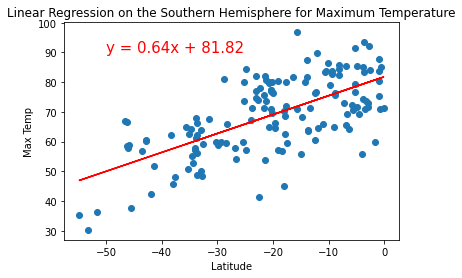

In [51]:
# Linear regression on the Southern Hemisphere for Max Temp
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Maximum Temperature', 'Max Temp',(-50,90))


In [52]:
#Check the R-Value
linregress(x_values, y_values)

LinregressResult(slope=0.6362699535976564, intercept=81.81948412589024, rvalue=0.6610311337041485, pvalue=8.138271952614462e-20, stderr=0.05997970026855252, intercept_stderr=1.4553509040413097)

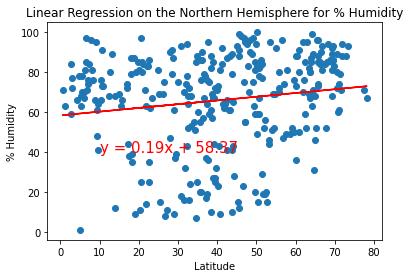

In [53]:
# Linear regression on the Northern Hemisphere for Humidity
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Humidity', '% Humidity',(10,40))

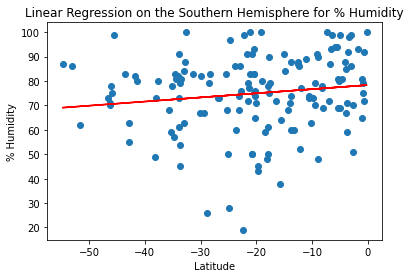

In [54]:
# Linear regression on the Northern Hemisphere for Humidity
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Humidity', '% Humidity',(10,40))

In [55]:
#Check the R-Value
linregress(x_values, y_values)

LinregressResult(slope=0.16902475171556425, intercept=78.36598599633612, rvalue=0.1428017327677438, pvalue=0.08444588668315473, stderr=0.09728791939614245, intercept_stderr=2.3605996830849274)

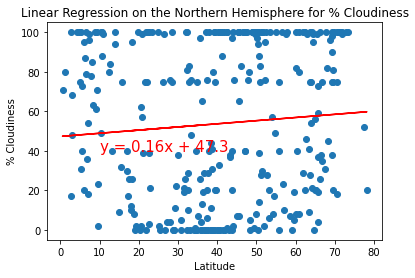

In [56]:
# Linear regression on the Northern Hemisphere for Cloudiness
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Cloudiness', '% Cloudiness',(10,40))

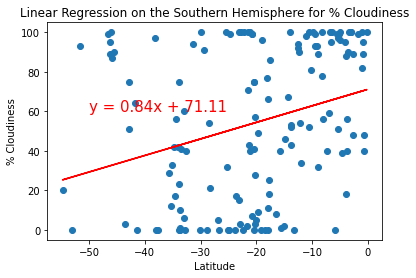

In [57]:
# Linear regression on the Southern Hemisphere for Cloudiness
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Cloudiness', '% Cloudiness',(-50,60))

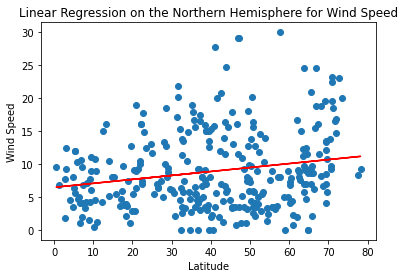

In [58]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Wind Speed', 'Wind Speed',(40,35))

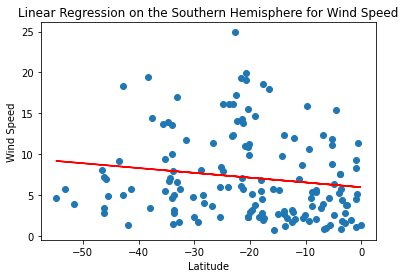

In [61]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Wind Speed', 'Wind Speed',(-50,35))